# Scraping notebook
From this notebook you can manually run the news articles scraping process and have some monitoring graphs

In [1]:
%reload_ext autoreload
%autoreload 2

In [39]:
from itertools import product
from datetime import datetime, timedelta

import numpy as np
from tqdm import tqdm

from elections import constants
from elections.scrapers.news_scraper import NewsScraper

In [50]:
SCRAPE_START_DATE = datetime.now() - timedelta(1) # constants.PM_RESIGNATION_DATE
SCRAPE_END_DATE = datetime.now() # - timedelta(2 * 7)

print(f"Scraping news articles from {SCRAPE_START_DATE} to {SCRAPE_END_DATE}")

Scraping news articles from 2024-03-07 04:18:51.118943 to 2024-03-08 04:18:51.118997


In [51]:
np.random.shuffle(constants.POLITICIANS)
print(constants.POLITICIANS)

query_list = list(product(constants.POLITICIANS, constants.NEWS_OUTLETS))

for politician, news_outlet in tqdm(query_list):
    query = f"{politician} {news_outlet}"
    news_finder = NewsScraper(query, SCRAPE_START_DATE, SCRAPE_END_DATE)
    news_finder.get_metadata()
    news_finder.get_article()
    news_finder.save_articles()

['Luís Montenegro', 'Pedro Nuno Santos', 'Inês de Sousa Real', 'Mariana Mortágua', 'André Ventura', 'Paulo Raimundo', 'Rui Tavares', 'Rui Rocha']


  0%|          | 0/176 [00:00<?, ?it/s]2024/03/08 04:18:53 - elections.scrapers.news_scraper - INFO: Getting metadata for Luís Montenegro Público
2024/03/08 04:18:53 - elections.scrapers.news_scraper - INFO: Getting metadata for Luís Montenegro Público
2024/03/08 04:18:53 - elections.scrapers.news_scraper - INFO: Getting metadata for Luís Montenegro Público
03/08/2024 04:18:53 AM - Getting metadata for Luís Montenegro Público
2024/03/08 04:18:59 - elections.scrapers.news_scraper - INFO: Found 19 metadata entries
2024/03/08 04:18:59 - elections.scrapers.news_scraper - INFO: Found 19 metadata entries
2024/03/08 04:18:59 - elections.scrapers.news_scraper - INFO: Found 19 metadata entries
03/08/2024 04:18:59 AM - Found 19 metadata entries
2024/03/08 04:18:59 - elections.scrapers.news_scraper - INFO: Getting articles
2024/03/08 04:18:59 - elections.scrapers.news_scraper - INFO: Getting articles
2024/03/08 04:18:59 - elections.scrapers.news_scraper - INFO: Getting articles
03/08/2024 04:18:5

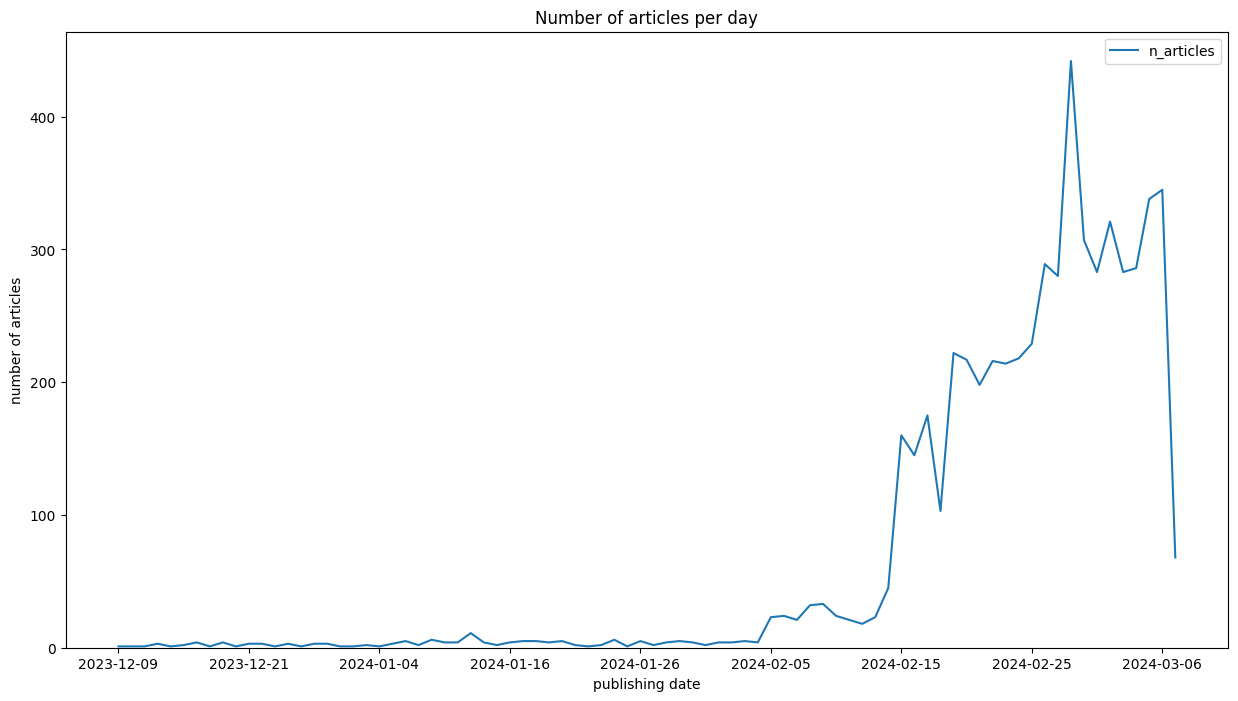

In [47]:
NewsScraper.plot_daily_article_counts()

n_ines_de_sousa_real     151
n_luis_montenegro       1968
n_andre_ventura         1229
n_pedro_nuno_santos     1889
n_paulo_raimundo         633
n_rui_rocha              775
n_mariana_mortagua       811
n_rui_tavares            610
dtype: int64


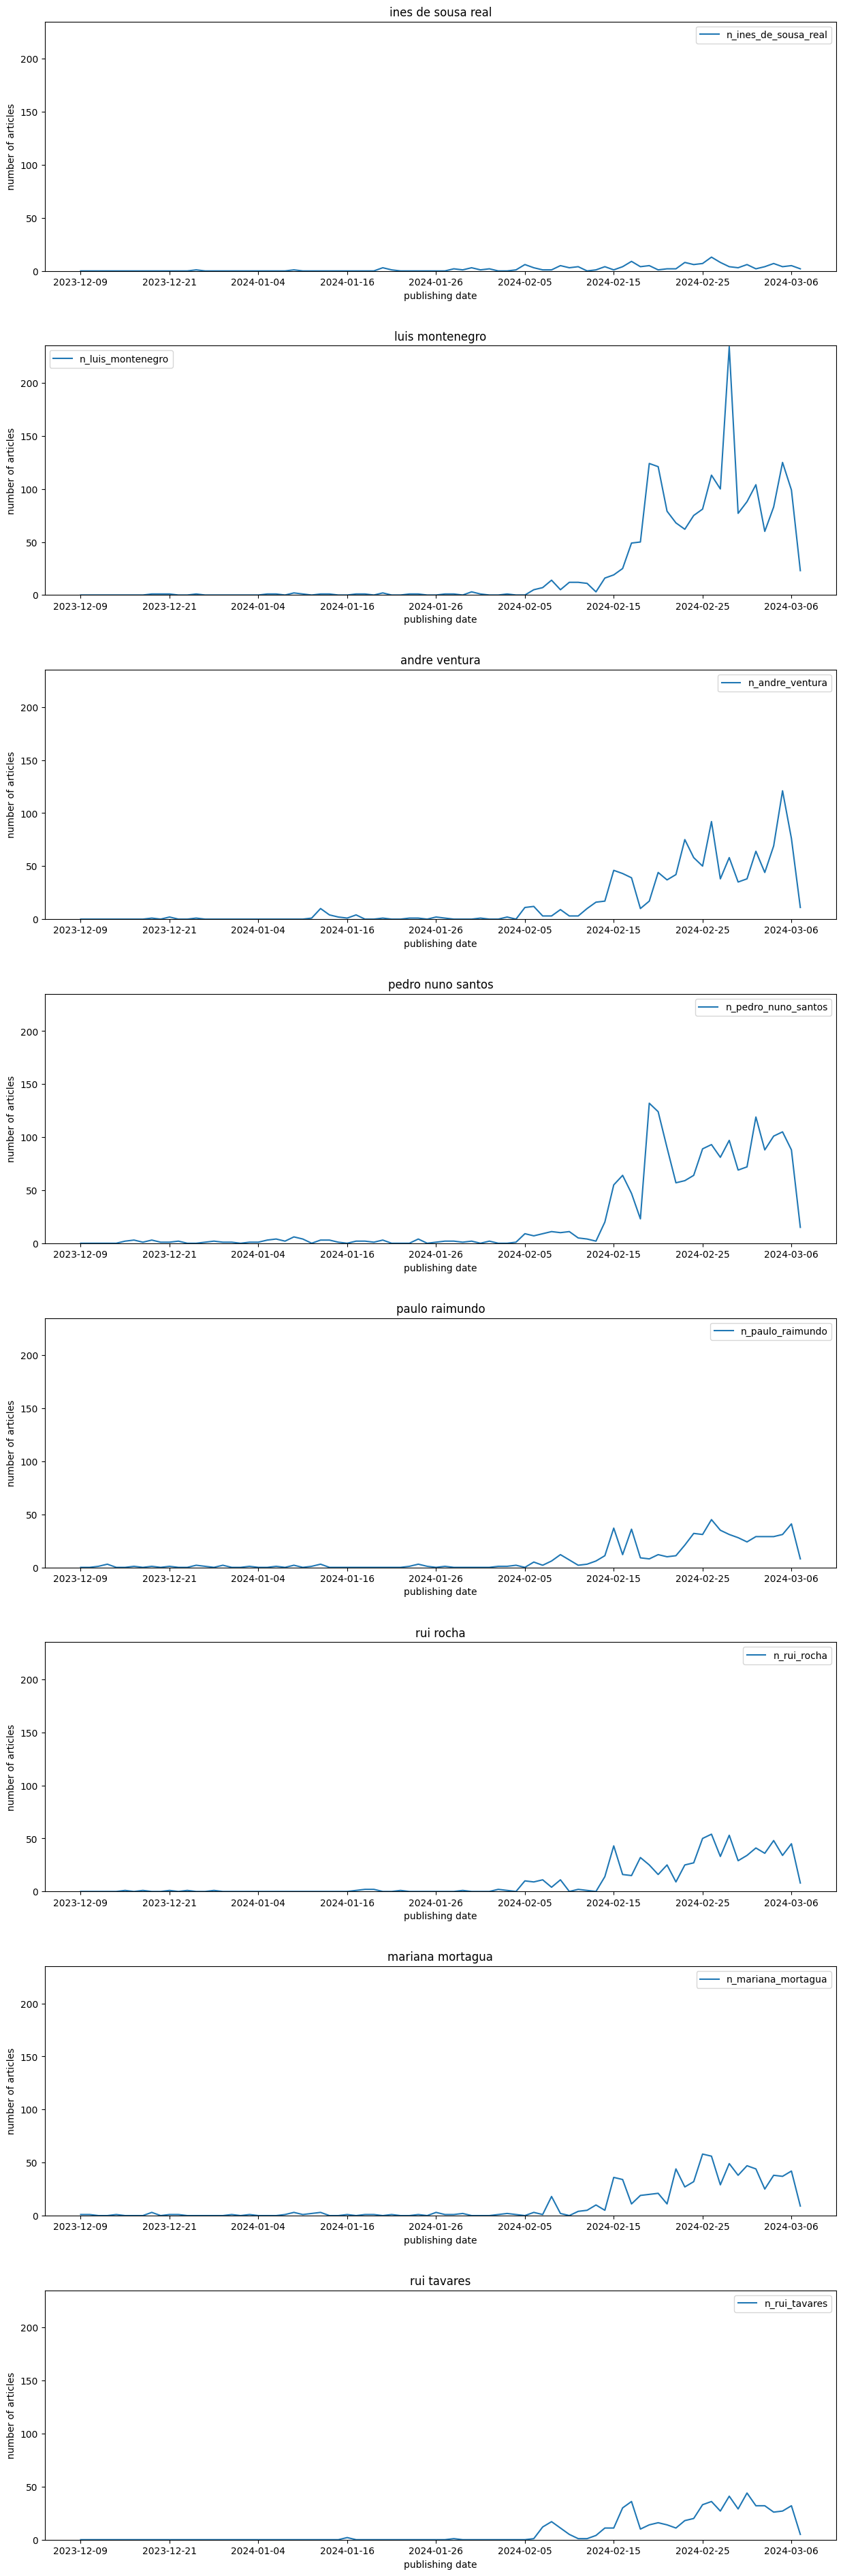

In [48]:
NewsScraper.plot_daily_politician_ref_counts()